<a href="https://colab.research.google.com/github/Mjcherono/Data-Visualization_dphi/blob/main/Data_Imbalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd # A fundamental package for linear algebra and multidimensional arrays
import numpy as np # Data analysis and data manipulating tool
import random # Library to generate random numbers
from collections import Counter # Collection is a Python module that implements specialized container datatypes providing
# alternatives to Python’s general purpose built-in containers, dict, list, set, and tuple.
# Counter is a dict subclass for counting hashable objects
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings in the notebook
import warnings
warnings.filterwarnings("ignore")

In [36]:
fraud_data = pd.read_csv("/content/fraud_data.csv")


In [37]:
fraud_data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2994681,0,242834,25.000,H,9803,583.0,150.0,visa,226.0,credit,269.0,87.0,NaN,NaN,yahoo.com,NaN,1,1,0,0,0,1,0,1,0,1,1,0,1,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,7.791666,0.791666,...,0.0,82050.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,NaN,529.0,178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10.12,firefox 56.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,rv:56.0
1,3557242,0,15123000,117.000,W,7919,194.0,150.0,mastercard,166.0,debit,181.0,87.0,483.0,NaN,gmail.com,NaN,1,4,0,0,0,1,0,0,3,0,3,0,4,1,63.0,35.0,1.0,4.0,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3327470,0,8378575,73.773,C,12778,500.0,185.0,mastercard,224.0,credit,284.0,60.0,NaN,NaN,hotmail.com,hotmail.com,1,3,0,1,0,1,1,0,0,0,2,2,3,1,54.0,54.0,35.0,54.0,35.0,54.0,35.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3118781,0,2607840,400.000,R,12316,548.0,150.0,visa,195.0,credit,441.0,87.0,NaN,371.0,anonymous.com,anonymous.com,1,1,0,1,0,1,0,1,0,1,1,0,1,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.0,183599.0,NaN,NaN,6.0,-11.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,15.0,352.0,280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 10.3.3,mobile safari generic,32.0,1136x640,match_status:2,T,F,T,F,mobile,iOS Device
4,3459772,0,12226544,31.950,W,9002,453.0,150.0,visa,226.0,debit,264.0,87.0,10.0,NaN,yahoo.com,NaN,3,3,0,0,3,4,0,0,3,0,2,0,33,3,54.0,54.0,15.0,405.0,32.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#Summary of dataset

fraud_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59054 entries, 0 to 59053
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(385), int64(18), object(31)
memory usage: 195.5+ MB


In [39]:
# Taking a look at the target variable

fraud_data.isFraud.value_counts()

0    57049
1     2005
Name: isFraud, dtype: int64

In [40]:
fraud_data.isFraud.value_counts() / len(fraud_data) * 100 # Gets the percentage of unique values in the variable 'isFraud'

0    96.604802
1     3.395198
Name: isFraud, dtype: float64

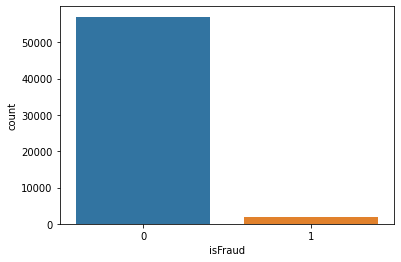

In [41]:
# we can also use countplot form seaborn to plot the above information graphically.

sns.countplot(fraud_data.isFraud)

In [42]:
#Missing values
fraud_data.isnull().sum() / len(fraud_data) * 100

TransactionID      0.000000
isFraud            0.000000
TransactionDT      0.000000
TransactionAmt     0.000000
ProductCD          0.000000
                    ...    
id_36             75.945745
id_37             75.945745
id_38             75.945745
DeviceType        75.979612
DeviceInfo        79.813391
Length: 434, dtype: float64

Missing values

In [43]:
fraud_data.isnull().sum() / len(fraud_data) * 100 # To get percentage of missing data in each column

TransactionID      0.000000
isFraud            0.000000
TransactionDT      0.000000
TransactionAmt     0.000000
ProductCD          0.000000
                    ...    
id_36             75.945745
id_37             75.945745
id_38             75.945745
DeviceType        75.979612
DeviceInfo        79.813391
Length: 434, dtype: float64

In [44]:
#Imputing missing data
fraud_data = fraud_data[fraud_data.columns[fraud_data.isnull().mean() < 0.2]] 

# Will keep those columns which has missing values less than 20%

In [45]:
# filling missing values of numerical columns with mean value.
num_cols = fraud_data.select_dtypes(include=np.number).columns # getting all the numerical columns

fraud_data[num_cols] = fraud_data[num_cols].fillna(fraud_data[num_cols].mean()) # fills the missing values with mean

In [46]:
cat_cols = fraud_data.select_dtypes(include = 'object').columns 
# getting all the categorical columns

fraud_data[cat_cols] = fraud_data[cat_cols].fillna(fraud_data[cat_cols].mode().iloc[0]) 
# fills the missing values with maximum occuring element in the column

In [47]:
# Check for missing values
fraud_data.isnull().sum() / len(fraud_data) * 100

TransactionID     0.0
isFraud           0.0
TransactionDT     0.0
TransactionAmt    0.0
ProductCD         0.0
                 ... 
V317              0.0
V318              0.0
V319              0.0
V320              0.0
V321              0.0
Length: 182, dtype: float64

One Hot Encoding Categorical Columns

In [48]:
fraud_data.shape

(59054, 182)

In [49]:
fraud_data = pd.get_dummies(fraud_data, columns=cat_cols) 

In [50]:
fraud_data.shape

(59054, 250)

Separating Y from X

In [51]:
# Separate input features and output feature
X = fraud_data.drop(columns = ['isFraud']) # input features
Y = fraud_data.isFraud # output feature

In [52]:
X.dtypes

TransactionID                   int64
TransactionDT                   int64
TransactionAmt                float64
card1                           int64
card2                         float64
                               ...   
P_emaildomain_yahoo.com.mx      uint8
P_emaildomain_yahoo.de          uint8
P_emaildomain_yahoo.es          uint8
P_emaildomain_yahoo.fr          uint8
P_emaildomain_ymail.com         uint8
Length: 249, dtype: object

In [53]:
# Scale

from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(X)
scaled_features = pd.DataFrame(data=scaled_features)
scaled_features.columns= X.columns

In [54]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)


#### Dealing with Imbalance.

**Different Techniques**

Resampling Techniques - Oversample Minority Class: Oversampling can be defined as adding more copies of the minority class. In other words, we are creating artificial/synthetic data of the minority class (or group). Oversampling could be a good choice when you don’t have a lot of data to work with.


In [55]:
from sklearn.utils import resample

# concatenate training data back together
train_data = pd.concat([X_train, Y_train], axis = 1)

# separate minority and majority class
not_fraud = train_data[train_data.isFraud==0]
fraud = train_data[train_data.isFraud==1]

# Unsample minority; we are oversampling the minority class to match the number of majority classs
fraud_upsampled = resample(fraud,
replace = True, # Sample with replacement
n_samples = len(not_fraud), # Match number in majority class
random_state=27)

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# Now let's check the classes count
upsampled.isFraud.value_counts()

1    39942
0    39942
Name: isFraud, dtype: int64

**Resampling Techniques**

Undersample Majority Class: Undersampling can be defined as removing some observations of the majority class. Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback is that we are removing information that may be valuable. This could lead to underfitting and poor generalization to the test set.

In [56]:
# we are still using our separated class i.e. fraud and not_fraud from above
# Again we are removing the observations of the majority class to mathch the number of minority class
# downsample majority
not_fraud_downsampled = resample(not_fraud,
replace = False, # sample without replacement
n_samples = len(fraud), # match minority n
random_state = 27)

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud]) # Concatenation

# let's check the classes counts
downsampled.isFraud.value_counts()


1    1395
0    1395
Name: isFraud, dtype: int64

**Generate Synthetic Samples:** 

Here we will use imblearn’s SMOTE or Synthetic Minority Oversampling Technique. SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.

In [57]:
# import SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 25, ratio = 1.0) # again we are eqalizing both the classes

# fit the sampling
X_train, Y_train = sm.fit_sample(X_train, Y_train)

np.unique(Y_train, return_counts=True) # Y_train is numpy array, so unique() functions returns the count of all the unique elements in the array


(array([0, 1]), array([39942, 39942]))